# Employee Group Project 23

##### By Tracy Gan, Aronn Laurel, Nikita Prabhu, Nolan Vu

# Introduction

### Data Description

We will work on the [Employee Dataset on Kaggle](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset) which contains information about the employees in the company, including their personal information such as age, gender, educational background, years of experience, salary tier, and the city where they work. The dataset also contains their information in regards to the company, such as the year they joined, and if they were ever benched. Specifically, each variable is broken down into

| Variable Name     | Type of Variable | Description |
|-------------------|------------------|-------------|
| Education         | Categorical  | It represents the educational qualities of employees. There are three unique levels for this categorical variable, which are Bachelors, Masters, and PHD.   |
| JoiningYear       | Categorical  | It represents the year each employee joined the company, which also indicates the length of their service to the company.  |
| City              | Categorical  | It represents the city where the employee works at. There are three unique values for this categorical variable, which are Bangalore, Pune, New Delhi.      |
| PaymentTier         | Categorical  | Categorization of employees into various salary levels (1-3)   |
| Age       | Continuous  | Employee Age  |
| Gender              | Categorical  | Employee Gender (Male/Female)  |
| EverBenched         | Categorical  | Whether an employee has ever been temporarily unassigned to work (Yes/No) |
| ExperienceInCurrentDomain       |  Continuous | Number of years of experience employees have in their current field |
| LeaveOrNot              | Categorical  | Our project's Target column, whether an employee will leave the company or not (0:Yes 1:No)     |

In total, there are 4653 rows of data for each column, where there are no missing values for any of the variables. This Employee dataset, found on Kaggle, came from the contributions of a HR department of a company, of which is anonymized as well as the people who contribute to this dataset. 


# Methods and Results

### Exploratory Data Analysis

In [1]:
# Firstly, we will load some libraries so that we can perform data analysis and visualisation to answer our question.

# Loading Libraries
library(tidyverse)
library(dplyr)
library(forcats)
library(ggplot2)
library(corrplot)
library(cowplot)
library(GGally)
library(glmbb)
library(broom)
library(latex2exp)
library(repr)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(modelr)
library(boot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘faraway’


The following object is masked from ‘package:GGally’:

    happy



Attaching package: ‘mltools’


The following object is masked from ‘p

In [2]:
employee_data <- read_csv('data/Employee.csv')
head(employee_data,6)
cat("Number of NA values:", sum(is.na(employee_data)), "\n")

Rows: 4653 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Education, City, Gender, EverBenched
dbl (5): JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0


Number of NA values: 0 


Overall our data does not have any missing values, nor is there inconsistency within our dataset. Hence, the cleaning and wrangling of the dataset will focus on removing variables that we are not interested in as well as conducting appropriate encoding techniques for our categorical variables.

In [3]:
plot1<-ggplot(employee_data, aes(x = Education)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in Education",
       x = "Education",
       y = "Count") +
  theme_minimal()
plot2<-ggplot(employee_data, aes(x = JoiningYear)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in JoiningYear",
       x = "JoiningYear",
       y = "Count") +
  theme_minimal()
plot3<-ggplot(employee_data, aes(x = City)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in City",
       x = "City",
       y = "Count") +
  theme_minimal()
plot4<-ggplot(employee_data, aes(x = PaymentTier	)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in PaymentTier	",
       x = "PaymentTier	",
       y = "Count") +
  theme_minimal()
plot5<-ggplot(employee_data, aes(x = Age)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in Age",
       x = "Age",
       y = "Count") +
  theme_minimal()
plot6<-ggplot(employee_data, aes(x = Gender)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in Gender",
       x = "Gender",
       y = "Count") +
  theme_minimal()
plot7<-ggplot(employee_data, aes(x = EverBenched)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in EverBenched",
       x = "EverBenched",
       y = "Count") +
  theme_minimal()
plot8<-ggplot(employee_data, aes(x = ExperienceInCurrentDomain)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in Experience",
       x = "ExperienceInCurrentDomain",
       y = "Count") +
  theme_minimal()
plot9<-ggplot(employee_data, aes(x = LeaveOrNot)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in LeaveOrNot",
       x = "LeaveOrNot",
       y = "Count") +
  theme_minimal()



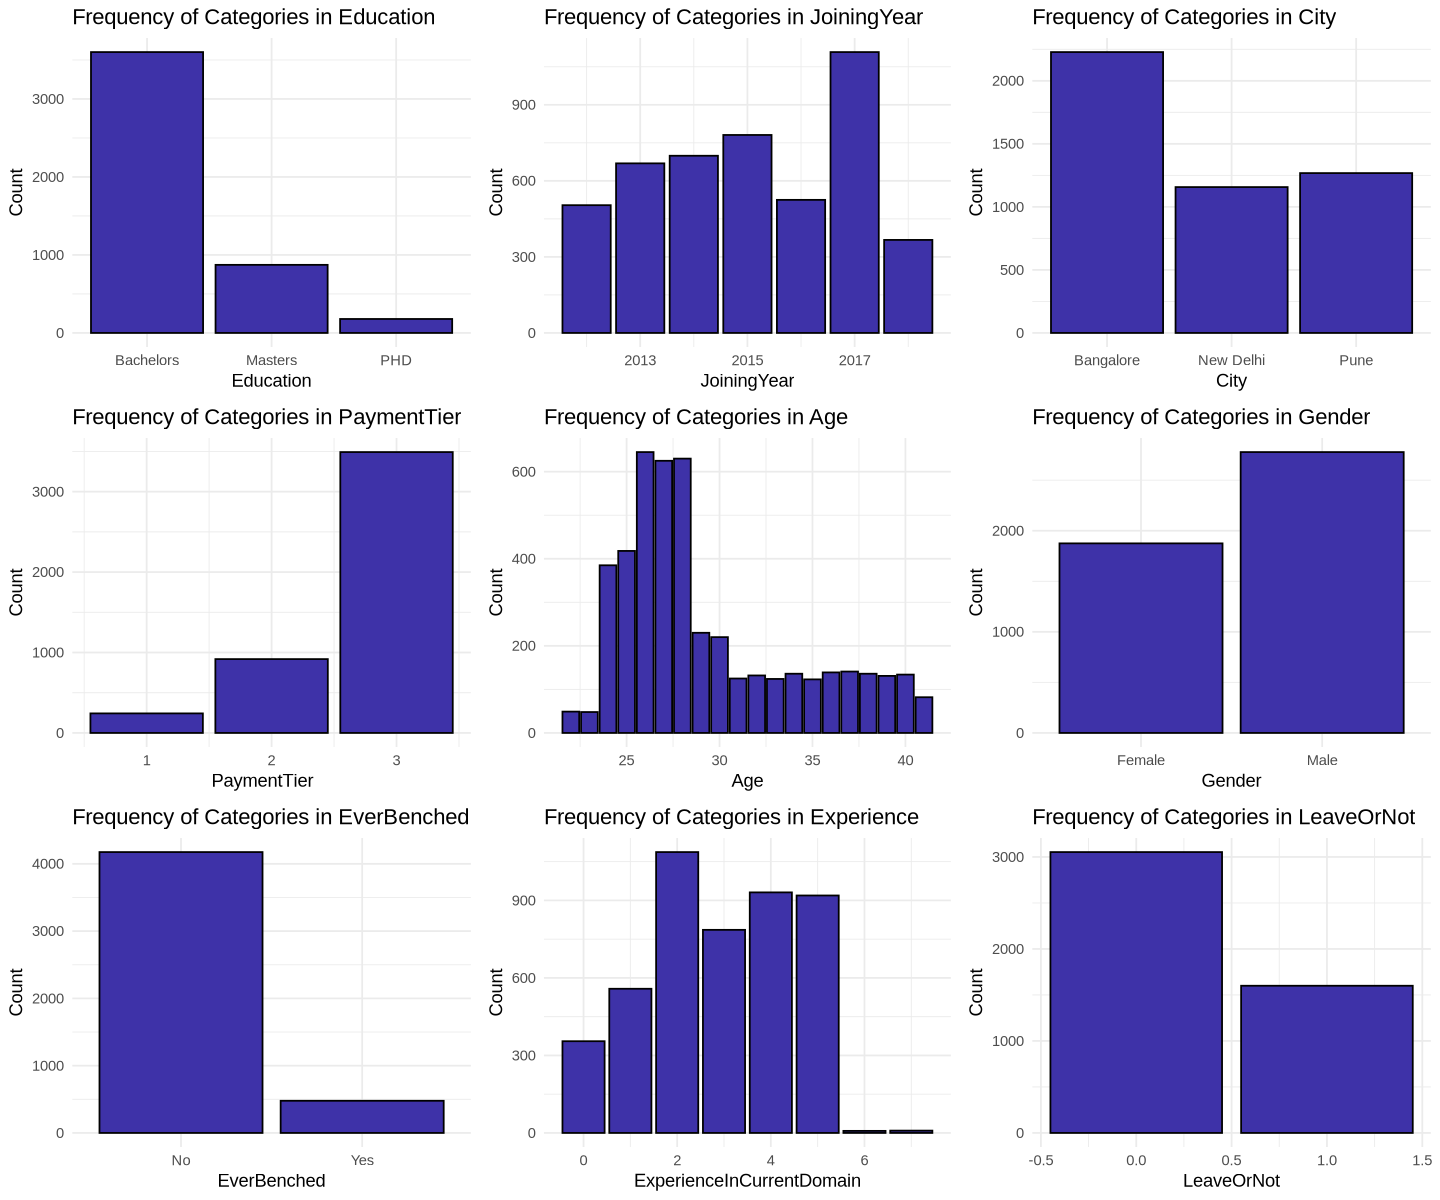

In [4]:
options(repr.plot.width = 12, repr.plot.height = 10) 
plot_grid(plot1, plot2,plot3, plot4,plot5, plot6,plot7, plot8,plot9, ncol = 3,nrow = 3)

The distribution plot for all variables in the dataset visualizes the characteristics of each variable, and help us find any patterns. We observe there are much more employees who have not been benched than those who have. There are three payment tiers where employee count increases with payment tier number. From this we can interpret payment tier 1 to rank the highest (with fewer employees), followed by tier 2 and finally tier 3 being the most common. The distribution plot of the City shows that the majority of employees are based in Bangalore, with a similar distribution of employees between Pune and New Delhi. The distribution plot of the Age shows that the highest number of employees falls within the 20-30 age range. The distribution plot of the LeaveOrNot shows that a higher number of employees are likely to leave the company compared to those who are not.

Let us plot the varibles with LeaveOrNot.

In [5]:
#Categorical variables
s_plot1<-ggplot(employee_data, aes(x = Education, fill = factor(LeaveOrNot))) +
  geom_bar(position = "fill") + 
  labs(title = "Proportion of Employees Who Will Stay or Leave by Education Level", 
       x = "Education Level", y = "Proportion of Employees") +
  theme_minimal()
s_plot2<-ggplot(employee_data, aes(x = City, fill = factor(LeaveOrNot))) +
  geom_bar(position = "fill") + 
  labs(title = "Proportion of Employees Who Will Stay or Leave by City", 
       x = "City", y = "Proportion of Employees") +
  theme_minimal()
s_plot3<-ggplot(employee_data, aes(x = PaymentTier, fill = factor(LeaveOrNot))) +
  geom_bar(position = "fill") + 
  labs(title = "Proportion of Employees Who Will Stay or Leave by PaymentTier", 
       x = "Payment Tier", y = "Proportion of Employees") +
  theme_minimal()
s_plot4<-ggplot(employee_data, aes(x = Gender, fill = factor(LeaveOrNot))) +
  geom_bar(position = "fill") + 
  labs(title = "Proportion of Employees Who Will Stay or Leave by Gender", 
       x = "Gender", y = "Proportion of Employees") +
  theme_minimal()
s_plot5<-ggplot(employee_data, aes(x = EverBenched, fill = factor(LeaveOrNot))) +
  geom_bar(position = "fill") + 
  labs(title = "Proportion of Employees Who Will Stay or Leave by Ever Benched", 
       x = "Ever Benched", y = "Proportion of Employees") +
  theme_minimal()
s_plot6<-ggplot(employee_data, aes(x = JoiningYear, fill = factor(LeaveOrNot))) +
  geom_bar(position = "fill") + 
  labs(title = "Proportion of Employees Who Will Stay or Leave by Joining Year", 
       x = "Joining Year(Years)", y = "Proportion of Employees") +
  theme_minimal()

#continous variables
b_plot1<-ggplot(employee_data, aes(x = LeaveOrNot, y = ExperienceInCurrentDomain,fill= factor(LeaveOrNot))) +
  geom_boxplot() +
  labs(title = "Experience vs LeaveOrNot",
       x = "LeaveOrNot",
       y = "Experience in Current Domain (Years)",
       fill = "LeaveOrNot") +
  theme_minimal() 
b_plot2<-ggplot(employee_data, aes(x = LeaveOrNot, y = Age,fill= factor(LeaveOrNot))) +
  geom_boxplot() +
  labs(title = "Age vs LeaveOrNot",
       x = "LeaveOrNot",
       y = "Age (Years)",
       fill = "LeaveOrNot") +
  theme_minimal() 
  

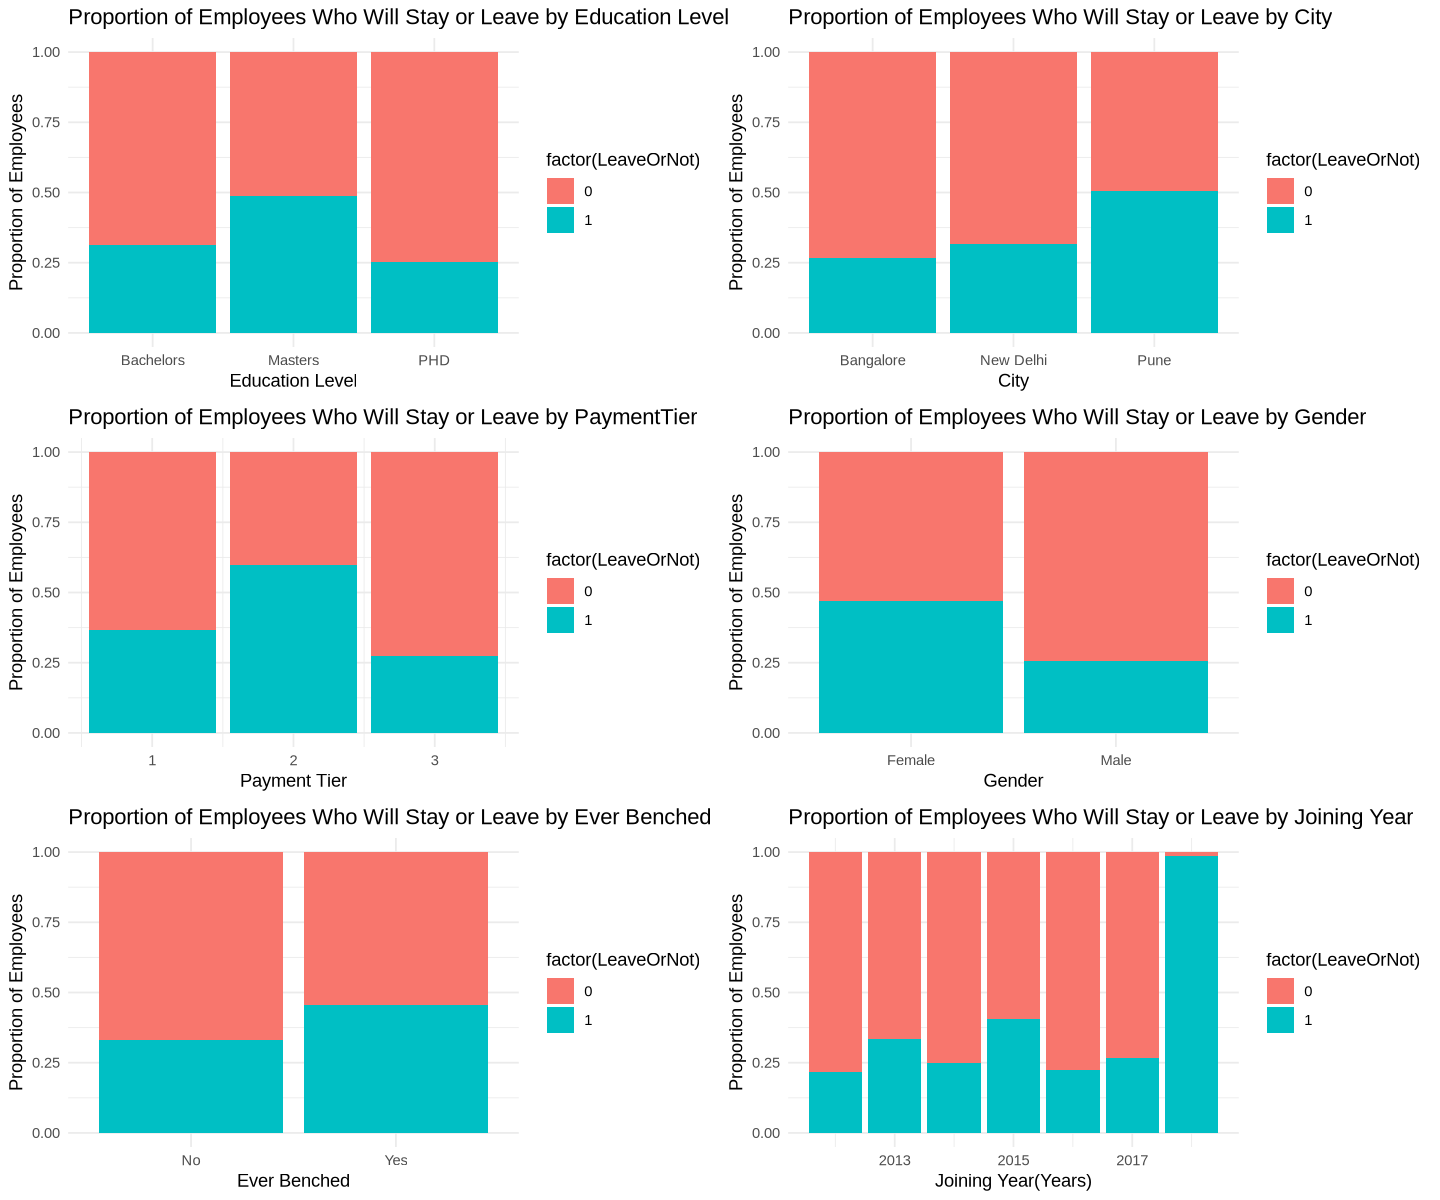

In [6]:
# options(repr.plot.width = 12, repr.plot.height = 10) 
plot_grid(s_plot1,s_plot2,s_plot3,s_plot4,s_plot5,s_plot6, ncol = 2,nrow = 3)

We observe from the plots that, in general the proportion of employees who leave the company is higher for all variables. The proportion of employees staying or leaving is different between catgeories for all the categorical variables. Payment tier 2 has the highest propportion of employees staying and payment 3 the least amount the tiers. Female employees exhibit a higher proportion of staying with the company compared to their male counterparts. For employees who joined up to 2017, the proportion of employees staying was lower. However, from 2018 onwards, the trend shifts, and most employees tend to stay with the company.

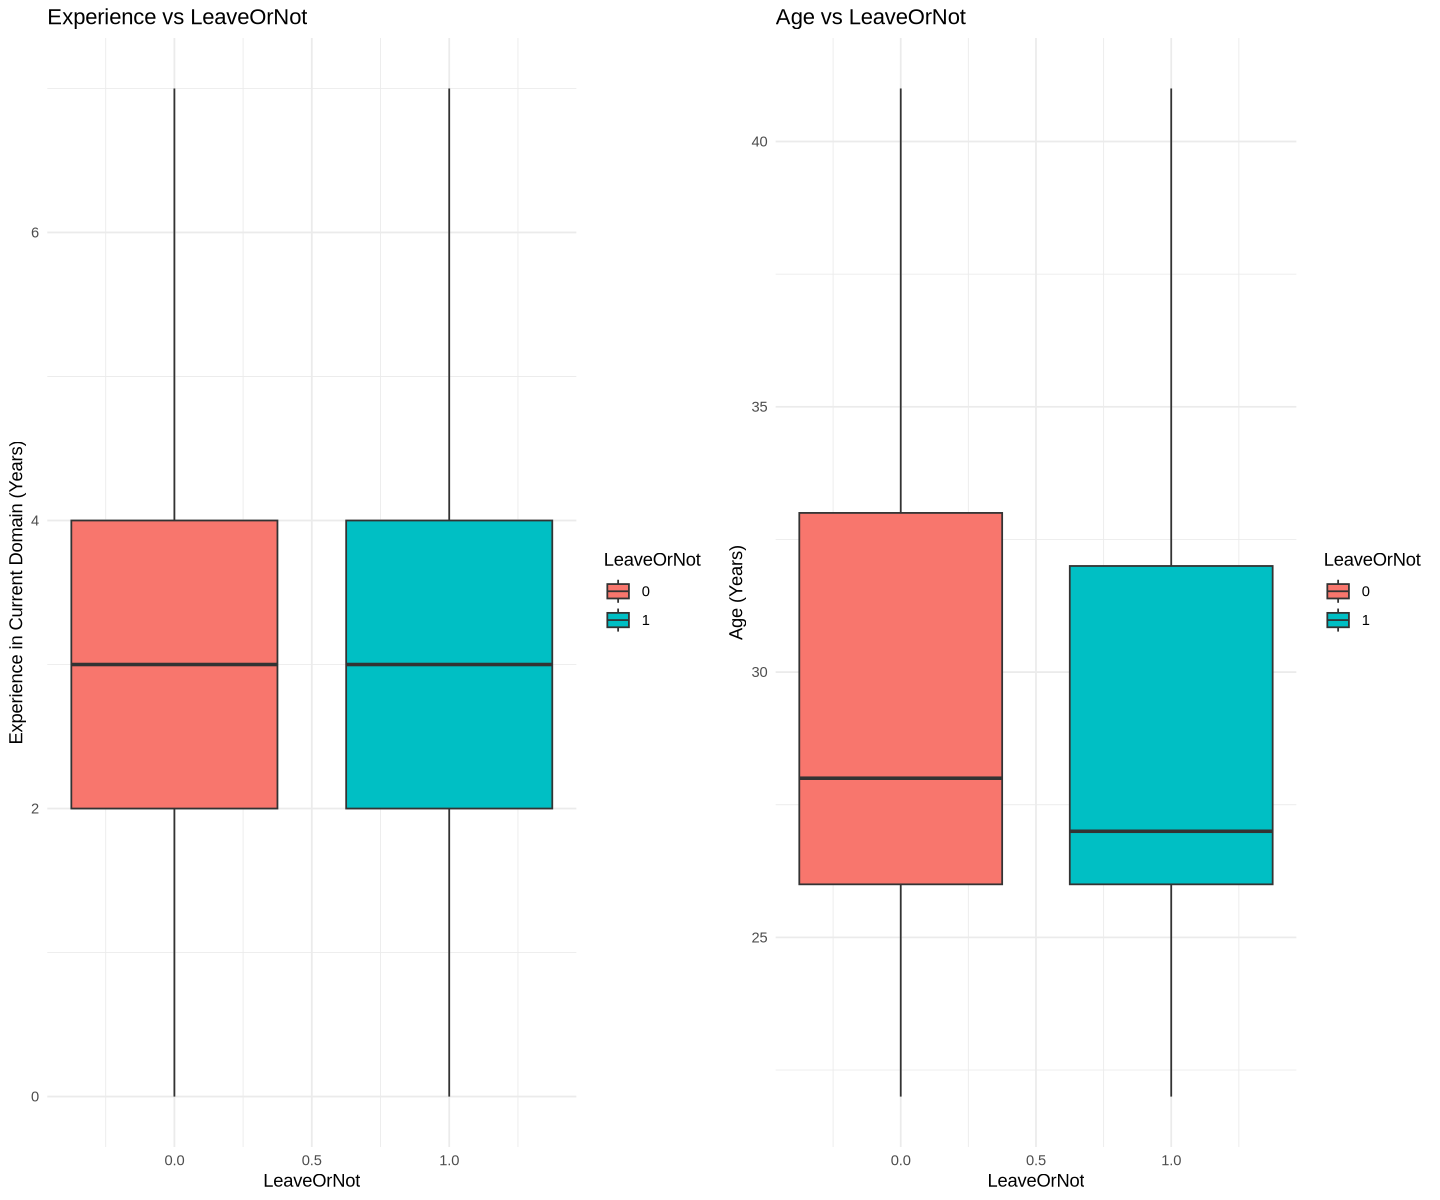

In [7]:
plot_grid(b_plot1,b_plot2, ncol = 2)

From the first boxplot it appears experience in current domain doesn’t seem to affect whether an employee leaves or not. On the other hand, age seems to affect if the employee stays. The median age for employees who leave the company is higher than that for employees who stay.

Now we must check for mulitcollinearity between the varibles. This is to ensure if any of our explanatory variables are not correlated with each other.

In [8]:
# Let us make the correlation matrix
employee_data_n <- employee_data %>%
    mutate(
        LeaveOrNot = as.numeric(LeaveOrNot)
    )|>
dplyr::select(-Education,-JoiningYear,-City,-PaymentTier,-Gender,-EverBenched)

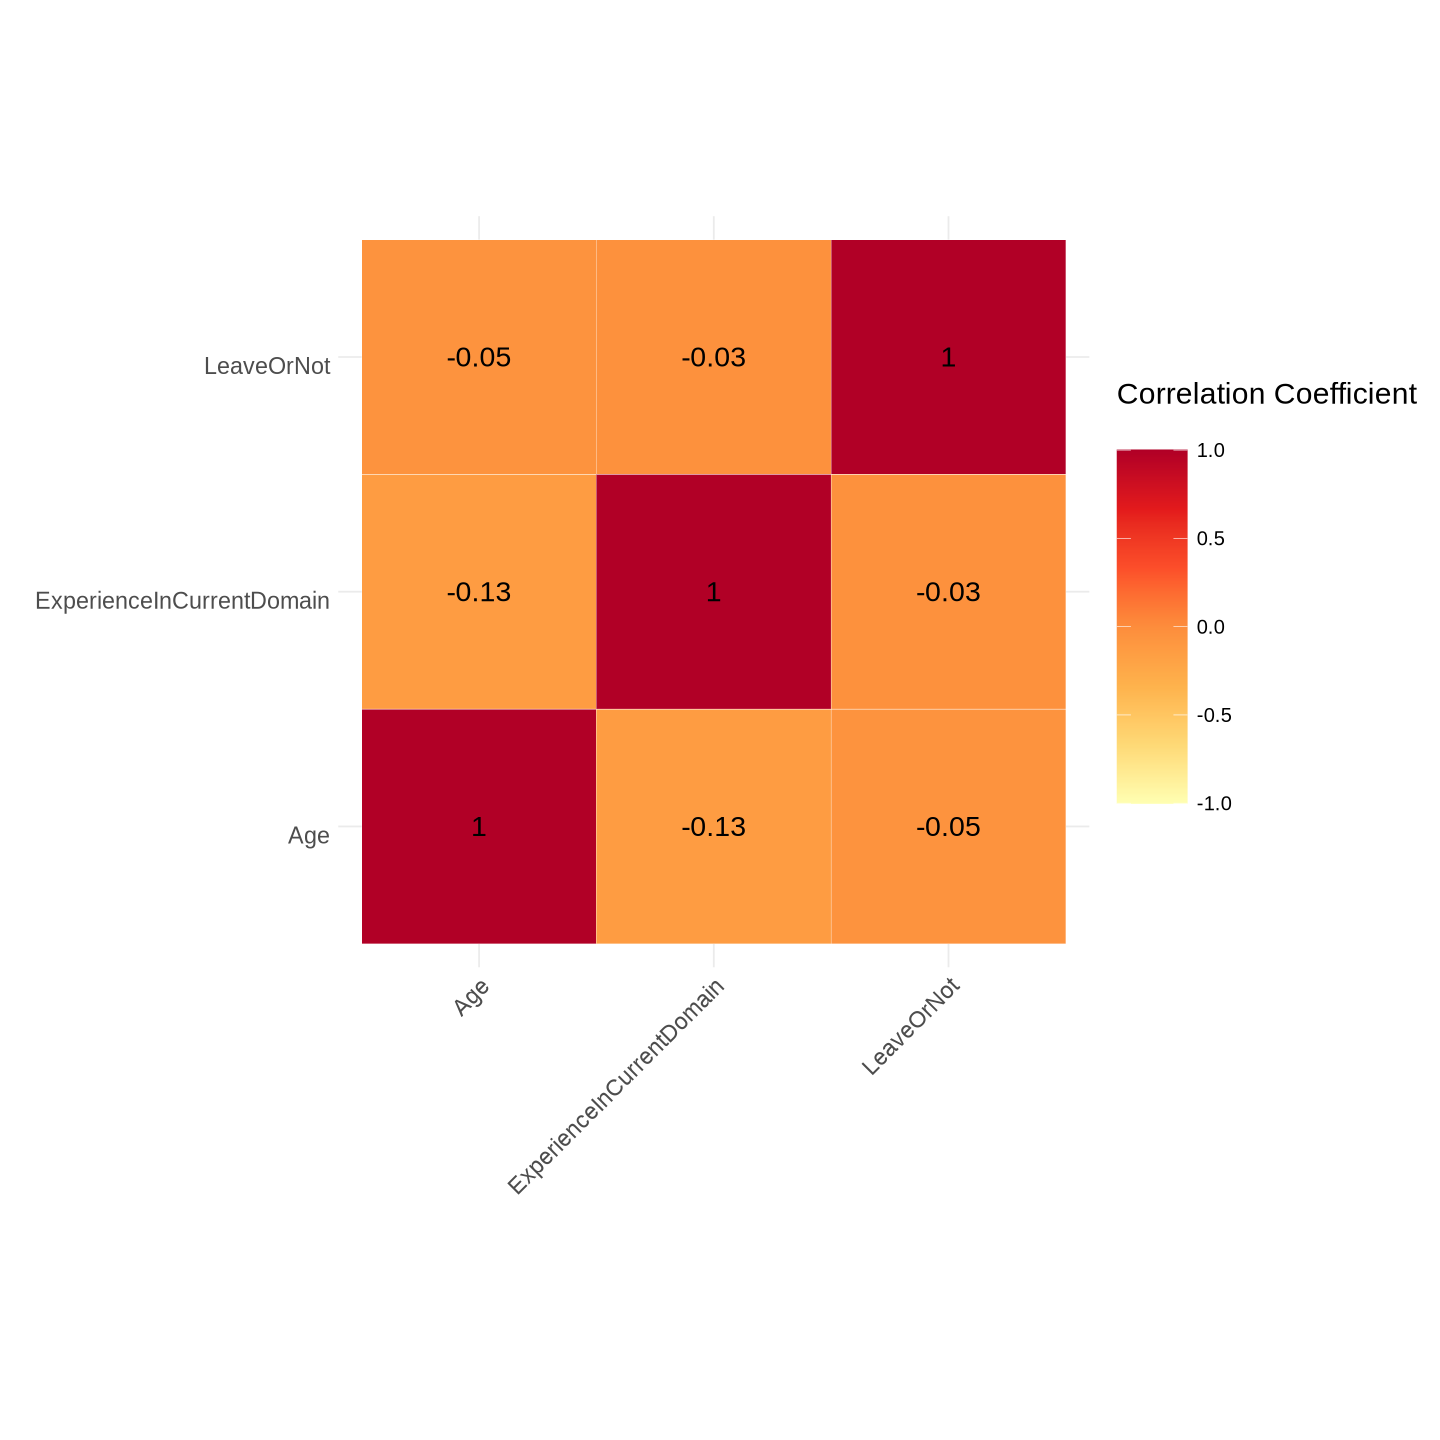

In [9]:
corr_matrix <- 
   employee_data_n %>%
   cor() %>%
   as_tibble(rownames = 'var1') %>%
   pivot_longer(-var1, names_to = "var2", values_to = "corr")
# corr_matrix

options(repr.plot.width = 12, repr.plot.height = 12) 

plot_corr_matrix <- 
  corr_matrix %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
      palette =  "YlOrRd",
      direction = 1, 
      limits = c(-1,1)
    ) +
    labs(x = "", y = "") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
        axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 12),
        legend.key.size = unit(1.5, "cm")
    ) +
    coord_fixed() +
  geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)


plot_corr_matrix


We observe fairly low correlation between the variables. Looking at the correlation between LeaveOrNot and the other variables the correlation appears to be low. However, interaction effects between variables might still exist. We can use logistic regression to build our model to answer our question, as the response variable is binary (0:Yes 1:No).

### Methods: Plan

In [10]:
# Adjust data types
employee_data_f <- employee_data %>%
  mutate(
    Education = as.factor(Education),
    JoiningYear = as.factor(JoiningYear),
    City = factor(City, levels = c("Bangalore", "Pune", "New Delhi")),
    PaymentTier = as.factor(PaymentTier),
    Gender = factor(Gender, levels = c("Male", "Female")),
    EverBenched = factor(EverBenched, levels = c("Yes", "No")),
    # LeaveOrNot = as.factor(LeaveOrNot),
    Age = as.numeric(Age)
  ) |>
select(-ExperienceInCurrentDomain)

In [11]:
# Let us transform our data using one hot encoding so as to accomodate the catagorical variables.
employee_encoded <- model.matrix(~ . - 1, data = employee_data_f)

employee_encoded<- as.data.frame(employee_encoded)|>select(-EducationBachelors)
head(employee_encoded)

,EducationMasters,EducationPHD,JoiningYear2013,JoiningYear2014,JoiningYear2015,JoiningYear2016,JoiningYear2017,JoiningYear2018,CityPune,CityNew Delhi,PaymentTier2,PaymentTier3,Age,GenderFemale,EverBenchedNo,LeaveOrNot
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,1,0,0,0,0,1,34,0,1,0
2,0,0,1,0,0,0,0,0,1,0,0,0,28,1,1,1
3,0,0,0,1,0,0,0,0,0,1,0,1,38,1,1,0
4,1,0,0,0,0,1,0,0,0,0,0,1,27,0,1,1
5,1,0,0,0,0,0,1,0,1,0,0,1,24,0,0,1
6,0,0,0,0,0,1,0,0,0,0,0,1,22,0,1,0


In [12]:
# code from tutorial 5
#split the data into training and test. 

set.seed(12223)

employee_sample <- 
    employee_encoded %>%
    mutate(id = row_number())

training_employee <- 
    employee_sample %>%
    slice_sample(prop = 0.6, replace = FALSE)

test_employee <- 
    employee_sample %>%
    anti_join(training_employee, by = "id")

training_employee <- 
    training_employee |>
    select(-id) 

test_employee <- 
    test_employee %>% 
    select(-id)

head(training_employee)
nrow(training_employee)

head(test_employee)
nrow(test_employee)

,EducationMasters,EducationPHD,JoiningYear2013,JoiningYear2014,JoiningYear2015,JoiningYear2016,JoiningYear2017,JoiningYear2018,CityPune,CityNew Delhi,PaymentTier2,PaymentTier3,Age,GenderFemale,EverBenchedNo,LeaveOrNot
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3707,0,0,0,0,0,0,1,0,0,0,0,1,35,0,1,0
768,0,0,0,0,0,0,0,1,0,0,0,1,26,0,1,1
1117,0,0,1,0,0,0,0,0,0,0,0,1,28,0,1,1
120,0,0,0,0,0,0,1,0,0,1,1,0,25,0,1,0
2588,0,0,0,0,1,0,0,0,1,0,0,1,29,0,1,0
437,1,0,0,1,0,0,0,0,0,0,0,1,26,0,1,1


[1] 2791

,EducationMasters,EducationPHD,JoiningYear2013,JoiningYear2014,JoiningYear2015,JoiningYear2016,JoiningYear2017,JoiningYear2018,CityPune,CityNew Delhi,PaymentTier2,PaymentTier3,Age,GenderFemale,EverBenchedNo,LeaveOrNot
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,1,0,0,0,0,1,34,0,1,0
8,0,0,0,0,0,1,0,0,0,0,0,1,34,1,1,1
12,0,0,0,0,0,1,0,0,1,0,0,1,34,0,1,0
13,0,0,0,0,0,0,0,1,1,0,0,1,32,0,0,1
17,0,0,0,1,0,0,0,0,0,0,0,1,34,1,1,0
20,0,0,0,0,0,1,0,0,0,1,1,0,22,1,1,1


[1] 1862

### Feature selection using backward selection

In [13]:
#split the training data into training and selection.
set.seed(12223)
training_sample <- 
    training_employee %>%
    mutate(id = row_number())

selection_employee <- 
    training_sample %>%
    slice_sample(prop = 0.6, replace = FALSE)

train_employee <- 
    training_sample %>%
    anti_join(selection_employee, by = "id")

train_employee <- 
    train_employee |>
    select(-id) 

selection_employee <- 
    selection_employee %>% 
    select(-id)

head(train_employee)
nrow(train_employee)

head(selection_employee)
nrow(selection_employee)

,EducationMasters,EducationPHD,JoiningYear2013,JoiningYear2014,JoiningYear2015,JoiningYear2016,JoiningYear2017,JoiningYear2018,CityPune,CityNew Delhi,PaymentTier2,PaymentTier3,Age,GenderFemale,EverBenchedNo,LeaveOrNot
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2588,0,0,0,0,1,0,0,0,1,0,0,1,29,0,1,0
437,1,0,0,1,0,0,0,0,0,0,0,1,26,0,1,1
1138,0,0,0,0,0,0,0,0,1,0,0,1,28,0,1,0
977,0,0,0,1,0,0,0,0,1,0,0,1,26,0,1,1
2195,0,0,0,1,0,0,0,0,0,0,0,1,30,0,1,0
2815,0,0,0,0,0,0,1,0,0,0,0,1,29,0,1,0


[1] 1117

,EducationMasters,EducationPHD,JoiningYear2013,JoiningYear2014,JoiningYear2015,JoiningYear2016,JoiningYear2017,JoiningYear2018,CityPune,CityNew Delhi,PaymentTier2,PaymentTier3,Age,GenderFemale,EverBenchedNo,LeaveOrNot
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
582,0,0,0,0,0,0,0,0,0,1,1,0,25,0,1,1
4134,1,0,0,0,0,0,0,1,0,1,0,1,34,0,1,1
1479,0,0,0,1,0,0,0,0,0,0,0,1,27,1,1,0
2916,0,0,0,0,0,0,0,1,0,0,0,1,27,0,1,1
2784,1,0,0,0,0,0,1,0,0,1,0,1,30,0,1,1
3151,0,0,0,0,0,0,0,0,0,0,0,1,34,0,1,0


[1] 1674

In [14]:
#backward selection to select variables
backward_sel <- regsubsets(
  x=LeaveOrNot ~ ., 
  nvmax=15,
  data=selection_employee,
  method="backward",
)

bwd_summary <- summary(backward_sel)
bwd_summary$which
bwd_summary_df <- 
    tibble(
        n_input_variables = 1:15,
        # RSQ = bwd_summary$rsq,
        # RSS = bwd_summary$rss,
        # ADJ.R2 = bwd_summary$adjr2,
        BIC = bwd_summary$bic,
        Cp = bwd_summary$cp
    )
bwd_summary_df

,(Intercept),EducationMasters,EducationPHD,JoiningYear2013,JoiningYear2014,JoiningYear2015,JoiningYear2016,JoiningYear2017,JoiningYear2018,CityPune,`CityNew Delhi`,PaymentTier2,PaymentTier3,Age,GenderFemale,EverBenchedNo
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE
4,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE
5,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE
6,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE
7,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE
8,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE
9,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
10,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE


n_input_variables,BIC,Cp
<int>,<dbl>,<dbl>
1,-337.9049,419.321967
2,-557.9046,155.912204
3,-611.6841,92.433131
4,-626.2625,71.473218
5,-655.4148,35.966075
6,-666.5575,19.238645
7,-666.3431,14.023048
8,-663.3997,11.554758
9,-659.7264,9.823714


Adjusted R^2 and R^2 may not be appropriate here as it is a logistic regression model. Let us choose the model with p covariates, which minimizes Cp and is close to p+1. Model with 9 covariates seems the most suitable. Based on BIC, model with 6 variables seems the most suitable. Let us compare them.

In [15]:
# model prioritizing Cp
leave_or_not_bwd1 <- 
  glm(formula =LeaveOrNot~EducationMasters+JoiningYear2017+JoiningYear2018+CityPune+
      `CityNew Delhi`+PaymentTier2+PaymentTier3+Age+GenderFemale,
      data = train_employee,
      family = binomial)
summary(leave_or_not_bwd1)


Call:
glm(formula = LeaveOrNot ~ EducationMasters + JoiningYear2017 + 
    JoiningYear2018 + CityPune + `CityNew Delhi` + PaymentTier2 + 
    PaymentTier3 + Age + GenderFemale, family = binomial, data = train_employee)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.01299    0.60474  -1.675  0.09392 .  
EducationMasters  1.26091    0.21658   5.822 5.82e-09 ***
JoiningYear2017  -0.98786    0.21773  -4.537 5.71e-06 ***
JoiningYear2018   4.55158    0.60333   7.544 4.56e-14 ***
CityPune          0.49868    0.19913   2.504  0.01227 *  
`CityNew Delhi`  -0.78670    0.22095  -3.561  0.00037 ***
PaymentTier2      1.90688    0.40208   4.743 2.11e-06 ***
PaymentTier3      0.21357    0.36167   0.591  0.55485    
Age              -0.02835    0.01639  -1.730  0.08372 .  
GenderFemale      1.00259    0.16464   6.090 1.13e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

 

In [16]:
# model prioritizing BIC
leave_or_not_bwd2 <- 
  glm(formula =LeaveOrNot~EducationMasters+JoiningYear2017+JoiningYear2018+
      `CityNew Delhi`+PaymentTier2+GenderFemale,
      data = train_employee,
      family = binomial)
summary(leave_or_not_bwd2)


Call:
glm(formula = LeaveOrNot ~ EducationMasters + JoiningYear2017 + 
    JoiningYear2018 + `CityNew Delhi` + PaymentTier2 + GenderFemale, 
    family = binomial, data = train_employee)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -1.4881     0.1209 -12.312  < 2e-16 ***
EducationMasters   1.3117     0.2157   6.081 1.19e-09 ***
JoiningYear2017   -1.0509     0.2165  -4.855 1.21e-06 ***
JoiningYear2018    4.5076     0.6015   7.494 6.66e-14 ***
`CityNew Delhi`   -1.0147     0.1990  -5.100 3.39e-07 ***
PaymentTier2       1.9196     0.2111   9.095  < 2e-16 ***
GenderFemale       0.9982     0.1621   6.157 7.44e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1442.7  on 1116  degrees of freedom
Residual deviance: 1040.2  on 1110  degrees of freedom
AIC: 1054.2

Number of Fisher Scoring iterations: 6


The AIC is lower for the first model. However, all the covariates are statistically significant in the second model. Also, based on principle of parimony let us favour the model based on BIC as it as fewer variables.

In [17]:
#let us check for multicollinearity
vif(leave_or_not_bwd2)

EducationMasters  JoiningYear2017  JoiningYear2018  `CityNew Delhi` 
        7.487914         9.923782        28.408872         8.812319 
    PaymentTier2     GenderFemale 
        7.652062         7.102959

JoiningYear2018 has a very high vif, which makes sense as the years could be correlated. We decided to use Year as a categorical variable rather than continuous which explains this. From our model we see that JoiningYear2018 has a large coefficient compared to JoiningYear2017, so let us remove the latter.

In [18]:
vif(glm(formula =LeaveOrNot~EducationMasters+JoiningYear2018+CityPune+`CityNew Delhi`+PaymentTier2+GenderFemale,
      data = train_employee,
      family = binomial))

EducationMasters  JoiningYear2018         CityPune  `CityNew Delhi` 
        7.190102        28.371669         7.989517        10.613487 
    PaymentTier2     GenderFemale 
        6.779377         6.925333

JoiningYear2018's vif doesnt seem to improve.

In [19]:
leave_or_not_bwd2 |>
tidy(exponentiate = TRUE) 

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.2257980,0.1208683,-12.311864,7.819639e-35
EducationMasters,3.7124431,0.2156871,6.081449,1.191016e-09
JoiningYear2017,0.3496295,0.2164629,-4.854786,1.205166e-06
JoiningYear2018,90.7027735,0.6014566,7.494453,6.657547e-14
`CityNew Delhi`,0.3625096,0.1989573,-5.100109,3.394578e-07
PaymentTier2,6.8182205,0.2110686,9.094667,9.487705e-20
GenderFemale,2.7133225,0.1621328,6.156522,7.436000e-10


### Regularization

# Discussion